#### About

> Transfer learning

Transfer learning is a technique within deep learning in which a pre-trained neural network model is used as a starting point for solving different but related problems. Instead of training a new model from scratch, transfer learning allows us to use knowledge gained from a large dataset for different tasks to improve the performance of smaller datasets on a target task. 

The main idea behind transfer learning is that neural networks learn general features from large data sets that can be used for other tasks. By using pre-trained models, we can exploit these learned features, reducing the amount of data and time required for training, while potentially improving performance on the target task. The learning transfer process usually includes the following steps:

1. Pre-training model selection: Choose a pre-training model that is trained on a large dataset and is appropriate for the target task. Models such as VGG, ResNet, Inception, and MobileNet that are pre-trained on large image datasets are commonly offered.

2. Adapting the model: Remove the original output layers from the pre-built model and replace them with new output layers specific to the target task. These new output layers are initialized randomly and will be trained from scratch during refinement. 

3. Refinement: train the modified pre-trained model on the target data set, usually using a lower learning rate to avoid overfitting and adapt the model to the specific characteristics of the target data set. Pre-trained layer weights can be frozen to prevent further updates or to allow refinement depending on the size of the target dataset and the amount of data available.

Transfer learning can have a number of benefits, including:

Performance improvement, Faster training and Reduced data requirements

In [1]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2023-04-22 04:46:09.481043: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 04:46:09.553350: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 04:46:09.555712: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 04:46:11.276747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [3]:
# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [4]:
# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [5]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


2023-04-22 04:46:23.936930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-22 04:46:23.938139: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


58889256/58889256 [==============================] - 10s 0us/step


In [6]:
# Add custom head to the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)


In [7]:
# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=predictions)


In [8]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=1, validation_data=(X_val, y_val))


625/625 [==============================] - 347s 555ms/step - loss: 1.3834 - accuracy: 0.5216 - val_loss: 1.2653 - val_accuracy: 0.5505


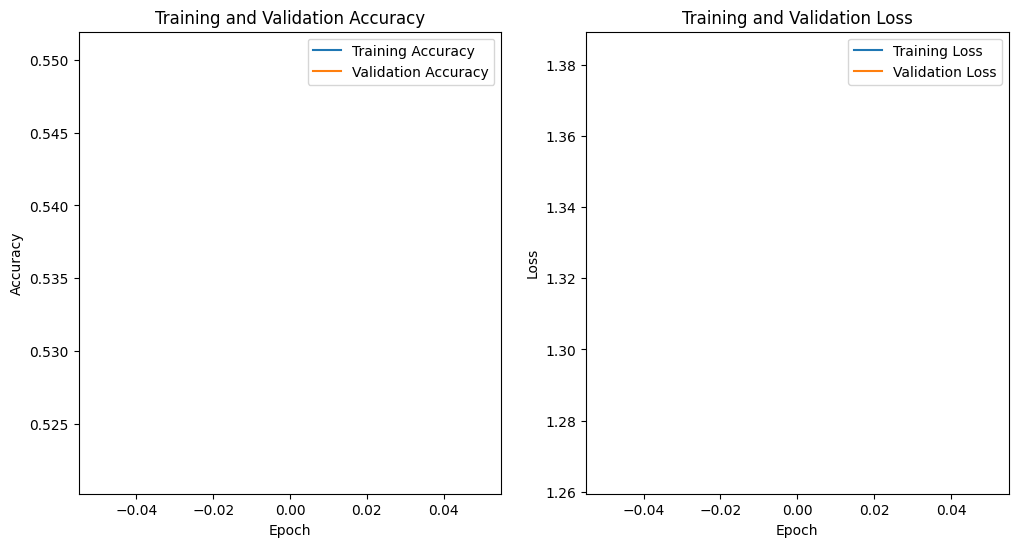

In [14]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.show()


In [13]:

# Evaluate the model on test data
score = model.evaluate(X_test, y_test, batch_size=64)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

157/157 [==============================] - 73s 467ms/step - loss: 1.2773 - accuracy: 0.5501
Test Loss: 1.2773349285125732
Test Accuracy: 0.5501000285148621
